In [1]:
import pandas as pd
import numpy as np

In [2]:
df_2004 = pd.read_stata("Individual_t104.dta")
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [3]:
#Primera parte

In [4]:
# Nos da el dato del primer valor de cada columna de la base de 2004
tipos_df_2004 = df_2004.iloc[0].apply(type).reset_index()
tipos_df_2004.columns = ['columna', 'tipo_del_primer_valor']
print(tipos_df_2004)

        columna    tipo_del_primer_valor
0        CODUSU            <class 'str'>
1     nro_hogar  <class 'numpy.float64'>
2    componente          <class 'float'>
3           h15            <class 'str'>
4          ano4  <class 'numpy.float64'>
..          ...                      ...
171     adeccfr            <class 'str'>
172       pj1_1          <class 'float'>
173       pj2_1          <class 'float'>
174       pj3_1          <class 'float'>
175      idimpp            <class 'str'>

[176 rows x 2 columns]


In [5]:
# Nos da el dato del primer valor de cada columna de la base de 2024
tipos_df_2024 = df_2024.iloc[0].apply(type).reset_index()
tipos_df_2024.columns = ['columna', 'tipo_del_primer_valor']
print(tipos_df_2024)

        columna    tipo_del_primer_valor
0        CODUSU            <class 'str'>
1          ANO4    <class 'numpy.int64'>
2     TRIMESTRE    <class 'numpy.int64'>
3     NRO_HOGAR    <class 'numpy.int64'>
4    COMPONENTE    <class 'numpy.int64'>
..          ...                      ...
172     RDECCFR    <class 'numpy.int64'>
173     GDECCFR  <class 'numpy.float64'>
174     PDECCFR  <class 'numpy.float64'>
175     ADECCFR    <class 'numpy.int64'>
176      PONDIH    <class 'numpy.int64'>

[177 rows x 2 columns]


In [6]:
# vemos que los datos de la base de 2004 estan en str
df_2004

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [7]:
# Reemplazo específico para columnas por valores númericos para igualar las bases
df_2004["trimestre"] = df_2004["trimestre"].replace({
    "1er. Trimestre": 1
})
df_2004["region"] = df_2004["region"].replace({
    "Gran Buenos Aires": 1,
    "NOA": 40,
    "NEA": 41,
    "Cuyo": 42,
    "Pampeana": 43,
    "Patagónica": 44
})
df_2004["aglomerado"] = df_2004["aglomerado"].replace({
    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36
})
df_2004["ch03"] = df_2004["ch03"].replace({
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
})
df_2004["ch04"] = df_2004["ch04"].replace({
    "Varón": 1,
    "Mujer": 2
})
df_2004["ch07"] = df_2004["ch07"].replace({
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5,
    "Ns./Nr.": 99
})
df_2004["ch08"] = df_2004["ch08"].replace({
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes": 123
})
df_2004["ch10"] = df_2004["ch10"].replace({
    "0": 0,
    "Sí, asiste": 1,
    "No asiste, pero asistió": 2,
    "Nunca asistió": 3,
    "Ns./Nr.": 99
})
df_2004["ch11"] = df_2004["ch11"].replace({
    "0": 0,
    "Público": 1,
    "Privado": 2,
    "Ns./Nr.": 99
})
df_2004["ch12"] = df_2004["ch12"].replace({
    "0": 0,
    "Jardín/Preescolar": 1,
    "Primario": 2,
    "EGB": 3,
    "Secundario": 4,
    "Polimodal": 5,
    "Terciario": 6,
    "Universitario": 7,
    "Posgrado Universitario": 8,
    "Educación especial (discapacitado)": 9,
    "Ns./Nr.": 99
})
df_2004["ch15"] = df_2004["ch15"].replace({
    "En esta localidad": 1,
    "En otra localidad": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "Ns./Nr.": 99
})
df_2004["ch16"] = df_2004["ch16"].replace({
    "En otro país": 5,
    "En un país limítrofe": 4,
    "En esta localidad": 1,
    "En otra provincia (especificar)": 3,
    "En otra localidad de esta provincia": 2,
    "No había nacido": 6,
    "Ns./Nr.": 99
})
df_2004["nivel_ed"] = df_2004["nivel_ed"].replace({
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7
})
df_2004["estado"] = df_2004["estado"].replace({
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
})
df_2004["cat_ocup"] = df_2004["cat_ocup"].replace({
    "0": 0,
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4
})
df_2004["cat_inac"] = df_2004["cat_inac"].replace({
    "0": 0,
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
})
df_2004["pp03c"] = df_2004["pp03c"].replace({
    "0": 0,
    "...un sólo empleo/ocupación/actividad?": 1,
    "...más de un empleo/ocupación/actividad?": 2,
    "Ns./Nr.": 99
})
df_2004["pp03h"] = df_2004["pp03h"].replace({
    "0": 0,
    "...podía trabajarlas esa semana?": 1,
    "...podía empezar a trabajarlas en dos semanas a más tardar?": 2,
    "...no podía trabajar más horas?": 3,
    "Ns./Nr.": 99
})
df_2004["intensi"] = df_2004["intensi"].replace({
    "0": 0,
    "Subocupación horaria Demandante": 1,
    "Subocupación horaria No Demandante": 2,
    "Ocupación plena": 3,
    "Sobreocupación horaria": 4,
    "Ocupado que no trabajó en la semana": 5,
    "Ns./Nr.": 99
})
df_2004["pp04a"] = df_2004["pp04a"].replace({
    "0": 0,
    "...estatal?": 1,
    "...privada?": 2,
    "...de otro tipo? (especificar)": 3,
    "Ns./Nr.": 99
})
df_2004["pp04c"] = df_2004["pp04c"].replace({
    "0": 0,
    "1 persona": 1,
    "2 personas": 2,
    "3 personas": 3,
    "4 personas": 4,
    "5 personas": 5,
    "de 6 a 10 personas": 6,
    "de 11 a 25 personas": 7,
    "de 26 a 40 personas": 8,
    "de 41 a 100 personas": 9,
    "de 101 a 200 personas": 10,
    "de 201 a 500 personas": 11,
    "más de 500 personas": 12,
    "Ns./Nr.": 99
})
df_2004["pp04g"] = df_2004["pp04g"].replace({
    "0": 0,
    "En un local/oficina/establecimiento/negocio/taller/chacra/fi": 1,
    "En puesto o kiosco fijo callejero": 2,
    "En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser": 3,
    "En vehículo para transporte de personas y mercaderías-aéreo,": 4,
    "En obras en construcción, de infraestructura, minería o simi": 5,
    "En esta vivienda": 6,
    "En la vivienda del socio o del patrón": 7,
    "En el domicilio/local de los clientes": 8,
    "En la calle/espacios públicos/ambulante/de casa en casa/pues": 9,
    "En otro lugar": 10,
    "Ns./Nr.": 99
})
df_2004["pp05c_1"] = df_2004["pp05c_1"].replace({
    "0": 0,
    "Propio (del negocio)": 1,
    "Prestado/alquilado": 2,
    "No tiene": 3
})
df_2004["pp05c_2"] = df_2004["pp05c_2"].replace({
    "0": 0,
    "Propio (del negocio)": 1,
    "Prestado/alquilado": 2,
    "No tiene": 3,
    "Ns./Nr.": 99
})
df_2004["pp05c_3"] = df_2004["pp05c_3"].replace({
    "0": 0,
    "Propio (del negocio)": 1,
    "Prestado/alquilado": 2,
    "No tiene": 3,
    "Ns./Nr.": 99
})
df_2004["pp05f"] = df_2004["pp05f"].replace({
    "0": 0,
    "Un solo cliente? (persona, empresa)": 6,
    "Distintos clientes? (incluye público en general)": 7
})
df_2004["pp05h"] = df_2004["pp05h"].replace({
    "0": 0,
    "Menos de un mes": 1,
    "De 1 a 3 meses": 2,
    "Más de 3 a 6 meses": 3,
    "Más de 6 meses a 1 año": 4,
    "Más de 1 a 5 años": 5,
    "Más de 5 años": 6,
    "Ns./Nr.": 99
})
df_2004["pp06e"] = df_2004["pp06e"].replace({
    "0": 0,
    "Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co": 1,
    "Es una sociedad de otra forma legal?": 2,
    "O es una sociedad convenida de palabra?": 3,
    "Ns./Nr.": 99
})
df_2004["pp07a"] = df_2004["pp07a"].replace({
    "0": 0,
    "Menos de un mes": 1,
    "1 a 3 meses": 2,
    "Más de 3 a 6 meses": 3,
    "Más de 6 a 12 meses": 4,
    "Más de 1 a 5 años": 5,
    "Más de 5 años": 6,
    "Ns./Nr.": 99
})
df_2004["pp07c"] = df_2004["pp07c"].replace({
    "0": 0,
    "Sí (incluye changa, trabajo transitorio, por tarea u obra, s": 1,
    "No (Incluye permanente, fijo, estable, de planta)": 2,
    "Ns./Nr.": 99
})
df_2004["pp07j"] = df_2004["pp07j"].replace({
    "0": 0,
    "...de día? (mañana/tarde)": 1,
    "...de noche": 2,
    "...de otro tipo? (rotativo, día y noche, guardias con franco": 3,
    "Ns./Nr.": 99
})
df_2004["pp07k"] = df_2004["pp07k"].replace({
    "0": 0,
    "...le dan recibo con sello/membrete/firma del empleador?": 1,
    "...le dan un papel/recibo sin nada?": 2,
    "...entrega una factura?": 3,
    "...no le dan ni entrega nada?": 4,
    "no cobra, es trabajador sin pago, ad-honorem": 5,
    "Ns./Nr.": 99
})
df_2004["pp09a"] = df_2004["pp09a"].replace({
    "0": 0,
    "Ciudad de Buenos Aires": 1,
    "Partidos del GBA": 2,
    "Ambos": 3,
    "En otro lugar": 4,
    "Ns./Nr.": 99,
    })
df_2004["pp10a"] = df_2004["pp10a"].replace({
    "0": 0,
    "...menos de 1 mes?": 1,
    "...de 1 a 3 meses?": 2,
    "...más de 3 a 6 meses?": 3,
    "...más de 6 a 12 meses?": 4,
    "...más de 1 año?": 5,
    "Ns./Nr.": 99
})
df_2004["pp10e"] = df_2004["pp10e"].replace({
    "0": 0,
    "...menos de 1 mes?": 1,
    "...de 1 a 3 meses?": 2,
    "...más de 3 a 6 meses?": 3,
    "...más de 6 a 12 meses?": 4,
    "...más de 1 a 3 años?": 5,
    "...más de 3 años?": 6,
    "Ns./Nr.": 99
})
df_2004["pp11a"] = df_2004["pp11a"].replace({
    "0": 0,
    "...estatal?": 1,
    "...privada?": 2,
    "...de otro tipo?": 3,
    "Ns./Nr.": 99
})
df_2004["pp11c"] = df_2004["pp11c"].replace({
    "0": 0,
    "1 persona": 1,
    "2 personas": 2,
    "3 personas": 3,
    "4 personas": 4,
    "5 personas": 5,
    "de 6 a 10 personas": 6,
    "de 11 a 25 personas": 7,
    "de 26 a 40 personas": 8,
    "de 41 a 100 personas": 9,
    "de 101 a 200 personas": 10,
    "de 201 a 500 personas": 11,
    "más de 500 personas": 12,
    "Ns./Nr.": 99
})
df_2004["pp11l"] = df_2004["pp11l"].replace({
    "0": 0,
    "Falta de clientes/clientes que no pagan": 1,
    "Falta de capital/equipamiento": 2,
    "Trabajo estacional": 3,
    "Tenía gastos demasiado altos": 4,
    "Otras causas laborales (especificar)": 5,
    "Causas personales (matrimonio, embarazo, cuidado de hijos o": 7,
    "Ns./Nr.": 99
})
df_2004["pp11l1"] = df_2004["pp11l1"].replace({
    "0": 0,
    "...una changa, trabajo transitorio, por tarea u obra, suplen": 1,
    "...un trabajo permanente, fijo estable, de planta, etc.?": 2,
    "Ns./Nr.": 99
})
df_2004["pp11m"] = df_2004["pp11m"].replace({
    "0": 0,
    "...un plan de empleo?": 1,
    "...un período de prueba?": 2,
    "...otro tipo de trabajo?": 3
})
df_2004["pp11o"] = df_2004["pp11o"].replace({
    "0": 0,
    "Despido/cierre": 1,
    "Por retiro voluntario del sector público": 2,
    "Por jubilación": 3,
    "Fin del trabajo temporario/estacional": 4,
    "Le pagaban poco/no le pagaban": 5,
    "Malas relaciones laborales/malas condiciones de trabajo (ins": 6,
    "Renuncia obligada/pactada": 7,
    "Otras causas laborales": 8,
    "Por razones personales": 9
})
df_2004["pj1_1"] = df_2004["pj1_1"].replace({
    "0": 0,
    "Tiene plan jefas y jefes": 1,
    "Ns./Nr.": 99
})
df_2004["pj2_1"] = df_2004["pj2_1"].replace({
    "0": 0,
    "Tiene plan jefas y jefes": 1,
    "Ns./Nr.": 99
})
df_2004["pj3_1"] = df_2004["pj3_1"].replace({
    "0": 0,
    "Tiene plan jefas y jefes": 1,
    "Ns./Nr.": 99
})

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\1694956567.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2004["trimestre"] = df_2004["trimestre"].replace({
C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\1694956567.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004["trimestre"] = df_2004["trimestre"].replace({
C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\1694956567.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `res

In [8]:
def reemplazar_valores(df, columnas):
    reemplazos = {
        "Sí": 1,
        "SÍ": 1,
        "No": 2,
        "NO": 2,
        "Ns./Nr.": 99
    }
    df[columnas] = df[columnas].replace(reemplazos)
    return df

# Lista completa de columnas
columnas_a_reemplazar = ["pp02c6", "pp02c7", "pp02c8", "pp02h", "pp02i", "pp03g", "pp03i", "pp03j", "pp05e",
    "pp06a", "pp06h", "pp07f1", "pp07f2", "pp07f3", "pp07f4", "pp07f5", "pp07g1",
    "pp07g2", "pp07g3", "pp07g4", "pp07h", "pp07i", "pp10c", "pp10d", "pp11n", "pp11p",
    "pp11q", "pp11r", "pp11s", "pp11t",
    "h15", "ch09", "ch13", "pp02c1", "pp02c2", "pp02c3", "pp02c4", "pp02c5"
]

# Aplicar reemplazo en df_2004
df_2004 = reemplazar_valores(df_2004, columnas_a_reemplazar)

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\3479526431.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas] = df[columnas].replace(reemplazos)
C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\3479526431.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columnas] = df[columnas].replace(reemplazos)
C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\3479526431.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

In [9]:
#df_2004[columnas_a_reemplazar] = df_2004[columnas_a_reemplazar].astype(str)

In [10]:
# Observamos los cambios realizados
df_2004

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1,1,S,32,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1,1,S,32,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1,1,S,32,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1,1,S,32,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1,1,S,32,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,1.0,2004.0,1,44,N,31,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,1.0,2004.0,1,44,N,31,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,1.0,2004.0,1,44,N,31,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1,44,N,31,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [11]:
# Ponemos los títulos en mayúsculas para filtrar la región
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [12]:
# Filtrar región NOA (REGION == 40)
df_2004_noa = df_2004[df_2004["REGION"] == 40]
df_2024_noa = df_2024[df_2024["REGION"] == 40]

In [13]:
# Mostrar conteo para verificar
print("Cantidad de registros en la región NOA:")
print("2004:", len(df_2004_noa))
print("2024:", len(df_2024_noa))

Cantidad de registros en la región NOA:
2004: 9393
2024: 9699


In [14]:
# Unión de las dos bases
df_unido = pd.concat([df_2004_noa, df_2024_noa], ignore_index=True)

In [15]:
# Definir los valores faltantes (0, y NaN)
valores_faltantes = [0, np.nan]

# Definir las variables de interés
variables_interes = [
    "CH04",  # Sexo
    "CH06",  # Edad
    "ESTADO",  # Condición de actividad
    "CAT_OCUP", # Categoría ocupacional
    "AGLOMERADO", # Código de Aglomerado
    "NIVEL_ED",  # Nivel educativo
    "P47T",  # Ingreso total individual
    "P21",  # MONTO DE INGRESO DE LA OCUPACIÓN PRINCIPAL
    "CH03",  # Relación de parentesco
    "CH07",  # Estado civil
    "CH08",  # ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan?
    "CH10",  # ¿Asiste o asistió a algún establecimiento educativo (colegio, escuela, universidad)?
    "CH11",  # Ese establecimiento es público, privado o Ns./Nr.?
    "CH12",  # Nivel cursado
    "CH13",  # ¿Lo finalizó ese nivel?
]

# Filtrar los datos para cada año (2004 y 2024) usando la columna 'ano4'
df_2004 = df_unido[df_unido['ANO4'] == 2004]
df_2024 = df_unido[df_unido['ANO4'] == 2024]

# Contar los valores faltantes en 2004 para las variables de interés
faltantes_2004 = df_2004[variables_interes].isin(valores_faltantes).sum() + df_2004[variables_interes].isna().sum()

# Contar los valores faltantes en 2024 para las variables de interés
faltantes_2024 = df_2024[variables_interes].isin(valores_faltantes).sum() + df_2024[variables_interes].isna().sum()

# Convertir las series a DataFrame para mostrar los resultados
faltantes_2004_df = faltantes_2004.to_frame(name="Faltantes_2004")
faltantes_2024_df = faltantes_2024.to_frame(name="Faltantes_2024")

# Mostrar los resultados
print("Faltantes 2004:")
print(faltantes_2004_df)
print("\nFaltantes 2024:")
print(faltantes_2024_df)

Faltantes 2004:
            Faltantes_2004
CH04                     0
CH06                     0
ESTADO                   8
CAT_OCUP              5624
AGLOMERADO               0
NIVEL_ED                 0
P47T                  5331
P21                   6578
CH03                     0
CH07                     0
CH08                     0
CH10                   328
CH11                  6135
CH12                   930
CH13                   931

Faltantes 2024:
            Faltantes_2024
CH04                     0
CH06                     0
ESTADO                   9
CAT_OCUP              5249
AGLOMERADO               0
NIVEL_ED                 0
P47T                  3371
P21                   5527
CH03                     0
CH07                     0
CH08                     0
CH10                   159
CH11                  6580
CH12                   353
CH13                   353


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#1

In [18]:
# Convertir la columna 'CH06' a tipo numérico antes de realizar la operación
df_unido["CH06"] = pd.to_numeric(df_unido["CH06"], errors='coerce')
df_unido["edad2"] = df_unido["CH06"] ** 2

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\1949011644.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unido["edad2"] = df_unido["CH06"] ** 2


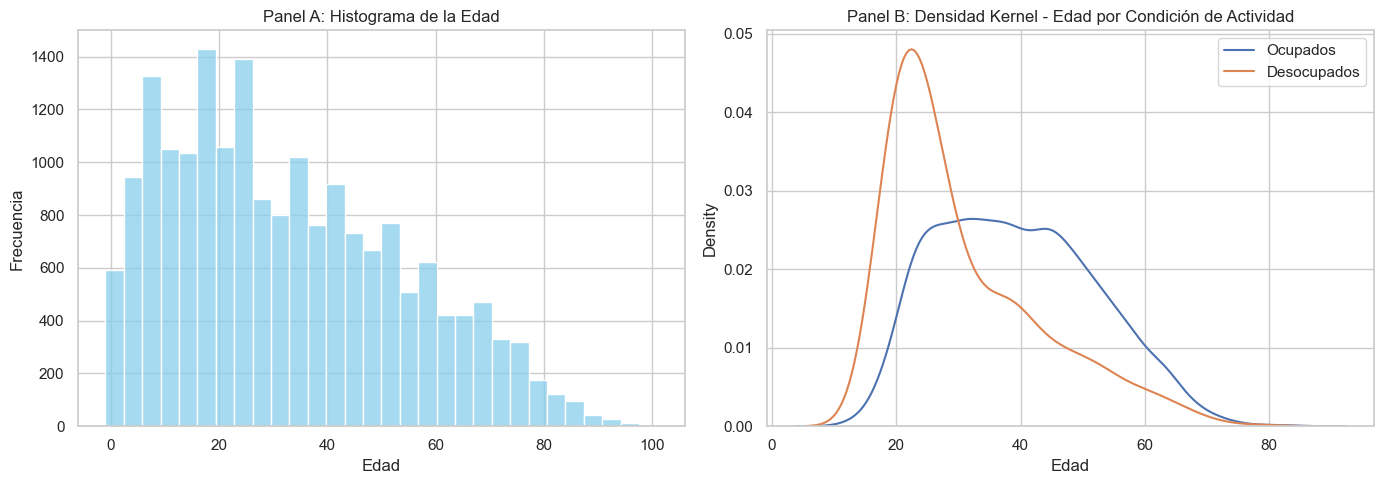

In [19]:
# Estilo general
sns.set(style="whitegrid")

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Histograma de la Edad
# Changed 'edad' to 'CH06' which has the age data
sns.histplot(data=df_unido, x="CH06", bins=30, kde=False, color="skyblue", ax=axes[0])
axes[0].set_title("Panel A: Histograma de la Edad")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Frecuencia")

# Panel B: Densidad de Kernel - Ocupados vs Desocupados
# Changed 'estado' to 'ESTADO' to match the uppercase column name
ocupados = df_unido[df_unido["ESTADO"] == 1]
desocupados = df_unido[df_unido["ESTADO"] == 2]

# Changed 'edad' to 'CH06' to reflect the actual column name
sns.kdeplot(data=ocupados, x="CH06", label="Ocupados", ax=axes[1])
sns.kdeplot(data=desocupados, x="CH06", label="Desocupados", ax=axes[1])

axes[1].set_title("Panel B: Densidad Kernel - Edad por Condición de Actividad")
axes[1].set_xlabel("Edad")
axes[1].legend()

plt.tight_layout()
plt.show()

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

#Descargamos las imágenes

# Asegurar que la variable 'edad' exista
df_unido["edad"] = df_unido["CH06"]  # Usá el nombre real si era otro

# PANEL A: Histograma de edades
plt.figure(figsize=(8,5))
plt.hist(df_unido["edad"], bins=30, color="skyblue", edgecolor="black")
plt.title("Panel A: Histograma de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("panelA_histograma_edad.png", dpi=300)
plt.close()

# PANEL B: Distribución kernel por estado laboral
plt.figure(figsize=(8,5))
sns.kdeplot(df_unido[df_unido["ESTADO"] == 1]["edad"], label="Ocupados", color="green")
sns.kdeplot(df_unido[df_unido["ESTADO"] == 2]["edad"], label="Desocupados", color="red")
plt.title("Panel B: Distribución Kernel por estado laboral")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.savefig("panelB_kernel_edad_ocupacion.png", dpi=300)
plt.close()

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\3008637490.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unido["edad"] = df_unido["CH06"]  # Usá el nombre real si era otro


In [20]:
#2

In [21]:
def calcular_anios_educacion(row):
    nivel = row["CH12"]
    finalizado = row["CH13"]
    ultimo_anio = row["CH14"]

    if pd.isnull(nivel):
        return np.nan

    try:
        nivel = int(nivel)
    except:
        return np.nan

    if pd.isnull(finalizado):
        finalizado = 0
    if pd.isnull(ultimo_anio):
        ultimo_anio = 0

    try:
        ultimo_anio = int(ultimo_anio)
    except:
        ultimo_anio = 0

    if nivel == 1:  # Sin instrucción
        return 0
    elif nivel == 2:  # Inicial
        return 1 if finalizado == 1 else 0
    elif nivel == 3:  # Primaria
        return 7 if finalizado == 1 else min(ultimo_anio, 6)
    elif nivel == 4:  # Secundaria
        return 12 if finalizado == 1 else 6 + min(ultimo_anio, 6)
    elif nivel == 5:  # Terciario o universitario
        return 17 if finalizado == 1 else 12 + min(ultimo_anio, 6)
    elif nivel == 6:  # Posgrado
        return 20 if finalizado == 1 else 17 + min(ultimo_anio, 6)
    else:
        return np.nan

# Aplicar función
df_unido["educ"] = df_unido.apply(calcular_anios_educacion, axis=1)

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\2497222563.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unido["educ"] = df_unido.apply(calcular_anios_educacion, axis=1)


In [22]:
stats_educ = df_unido["educ"].describe(percentiles=[0.5])
print(stats_educ[["mean", "std", "min", "50%", "max"]])

mean     7.473037
std      6.418079
min      0.000000
50%      8.000000
max     23.000000
Name: educ, dtype: float64


In [24]:
#3

In [25]:
factor_inflacion = 140.0  # ajuste IPC 2004 → 2024

def calcular_salario_semanal(row):
    ingreso = row["P21"]
    if pd.isnull(ingreso):
        return np.nan
    if row["ANO4"] == 2004:
        ingreso_ajustado = ingreso * factor_inflacion
    else:
        ingreso_ajustado = ingreso
    return ingreso_ajustado / 40

df_unido["salario_semanal"] = df_unido.apply(calcular_salario_semanal, axis=1)

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\344070032.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unido["salario_semanal"] = df_unido.apply(calcular_salario_semanal, axis=1)


In [134]:
(df_unido["salario_semanal"] == 0).sum()

12105

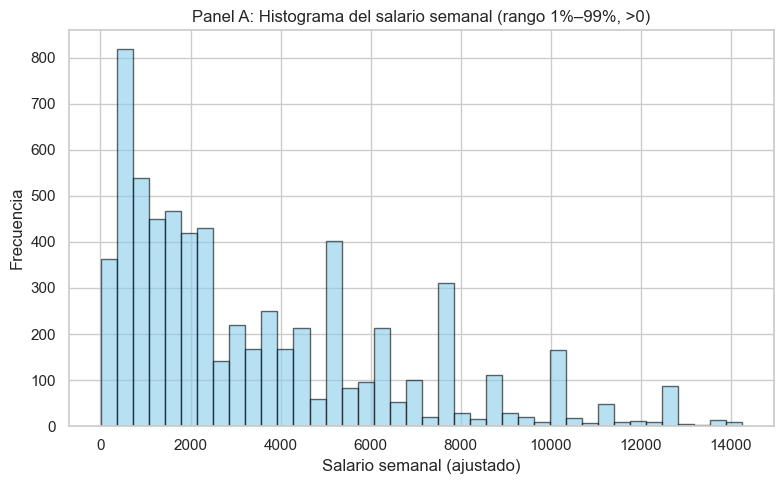

C:\Users\lbust\AppData\Local\Temp\ipykernel_20460\1172371425.py:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_desocup["salario_semanal"], label="Desocupados", fill=True, alpha=0.5, color="red")


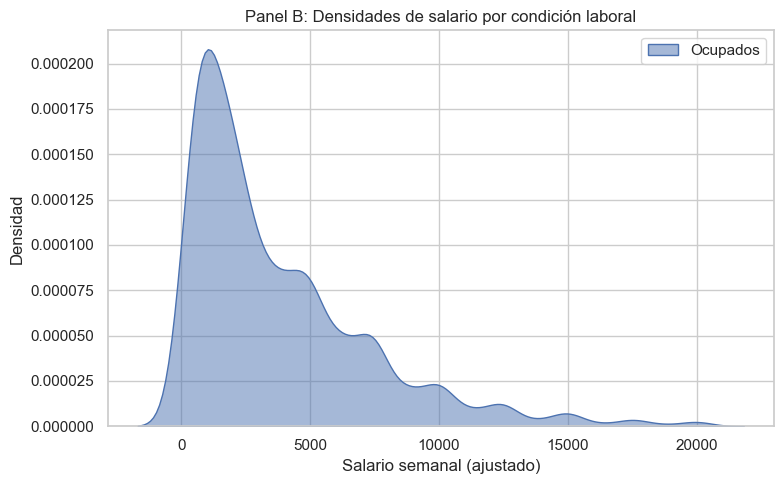

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# FILTROS Y PREPARACIÓN DE DATOS
# -----------------------------

# Panel A: recorte 1%–99% + exclusión de ceros
q1 = df_unido["salario_semanal"].quantile(0.01)
q99 = df_unido["salario_semanal"].quantile(0.99)
df_salario = df_unido[
    (df_unido["salario_semanal"] > 0) &  # excluye ceros
    (df_unido["salario_semanal"] >= q1) &
    (df_unido["salario_semanal"] <= q99)
]

# Panel B: ocupados recortados al 1–99%, desocupados sin filtro
df_ocup = df_unido[(df_unido["ESTADO"] == 1) & (df_unido["salario_semanal"] > 0)]
df_desocup = df_unido[(df_unido["ESTADO"] == 2) & (df_unido["salario_semanal"].notnull())]

q1_ocup = df_ocup["salario_semanal"].quantile(0.01)
q99_ocup = df_ocup["salario_semanal"].quantile(0.99)
df_ocup = df_ocup[
    (df_ocup["salario_semanal"] >= q1_ocup) &
    (df_ocup["salario_semanal"] <= q99_ocup)
]

# -----------------------------
# PANEL A – Histograma
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(df_salario["salario_semanal"], bins=40, color="skyblue", edgecolor="black", alpha=0.6)
plt.title("Panel A: Histograma del salario semanal (rango 1%–99%, >0)")
plt.xlabel("Salario semanal (ajustado)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("panelA_histograma_salario_filtrado.png", dpi=300)
plt.show()
plt.close()

# -----------------------------
# PANEL B – Densidad kernel
# -----------------------------
plt.figure(figsize=(8,5))
sns.kdeplot(df_ocup["salario_semanal"], label="Ocupados", fill=True, alpha=0.5)
sns.kdeplot(df_desocup["salario_semanal"], label="Desocupados", fill=True, alpha=0.5, color="red")
plt.title("Panel B: Densidades de salario por condición laboral")
plt.xlabel("Salario semanal (ajustado)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.savefig("panelB_kernel_salario_ocup_desocup.png", dpi=300)
plt.show()
plt.close()


In [ ]:
#4

In [107]:
# Filtrar solo personas ocupadas (ESTADO == 1)
df_ocupados = df_unido[df_unido["ESTADO"] == 1]

# Crear variable horastrab sin warning
df_ocupados.loc[:, "horastrab"] = df_ocupados["PP3E_TOT"].fillna(0) + df_ocupados["PP3F_TOT"].fillna(0)

# Estadísticas descriptivas
estadisticas_horastrab = df_ocupados["horastrab"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
estadisticas_horastrab.rename({
    "mean": "Promedio",
    "std": "Desviación estándar",
    "min": "Mínimo",
    "50%": "Mediana (p50)",
    "max": "Máximo"
}, inplace=True)

estadisticas_horastrab

Promedio                35.006711
Desviación estándar     20.859359
Mínimo                   0.000000
Mediana (p50)           36.000000
Máximo                 126.000000
Name: horastrab, dtype: float64

In [30]:
#5

In [31]:
def resumen_base(df):
    # Filtrar solo la región 40
    df = df[df['REGION'] == 40]

    # Filtrar las observaciones para los años 2004 y 2024
    df_2004 = df[df['ANO4'] == 2004]
    df_2024 = df[df['ANO4'] == 2024]

    # Calcular la cantidad de observaciones para cada año
    obs_2004 = len(df_2004)
    obs_2024 = len(df_2024)
    total_obs = obs_2004 + obs_2024

    # Calcular las observaciones con NaN en la variable "Estado"
    na_estado_2004 = df_2004[df_2004['ESTADO'] == 0].shape[0]
    na_estado_2024 = df_2024[df_2024['ESTADO'] == 0].shape[0]

    # Calcular la cantidad de ocupados y desocupados para cada año
    ocupados_2004 = (df_2004['ESTADO'] == 1).sum()
    desocupados_2004 = (df_2004['ESTADO'] == 2).sum()
    ocupados_2024 = (df_2024['ESTADO'] == 1).sum()
    desocupados_2024 = (df_2024['ESTADO'] == 2).sum()

    # Número de variables limpias y homogeneizadas
    num_vars = len(df.columns)

    # Crear el DataFrame de resumen
    resumen = pd.DataFrame({
        'Categoría': [
            'Cantidad de observaciones',
            'Cantidad de observaciones con NaN en la variable "Estado"',
            'Cantidad de Ocupados',
            'Cantidad de Desocupados',
            'Cantidad de variables limpias y homogeneizadas'
        ],
        '2004': [
            obs_2004,
            na_estado_2004,
            ocupados_2004,
            desocupados_2004,
            num_vars
        ],
        '2024': [
            obs_2024,
            na_estado_2024,
            ocupados_2024,
            desocupados_2024,
            num_vars
        ],
        'Total': [
            total_obs,
            na_estado_2004 + na_estado_2024,
            ocupados_2004 + ocupados_2024,
            desocupados_2004 + desocupados_2024,
            num_vars
        ]
    })

    return resumen

# Ejecutar la función para crear el resumen
resumen_df = resumen_base(df_unido)

# Mostrar el resultado
print(resumen_df.to_string(index=False))

                                                Categoría  2004  2024  Total
                                Cantidad de observaciones  9393  9699  19092
Cantidad de observaciones con NaN en la variable "Estado"     8     9     17
                                     Cantidad de Ocupados  3337  4263   7600
                                  Cantidad de Desocupados   597   256    853
           Cantidad de variables limpias y homogeneizadas   185   185    185


In [32]:
#Segunda parte

In [33]:
#1

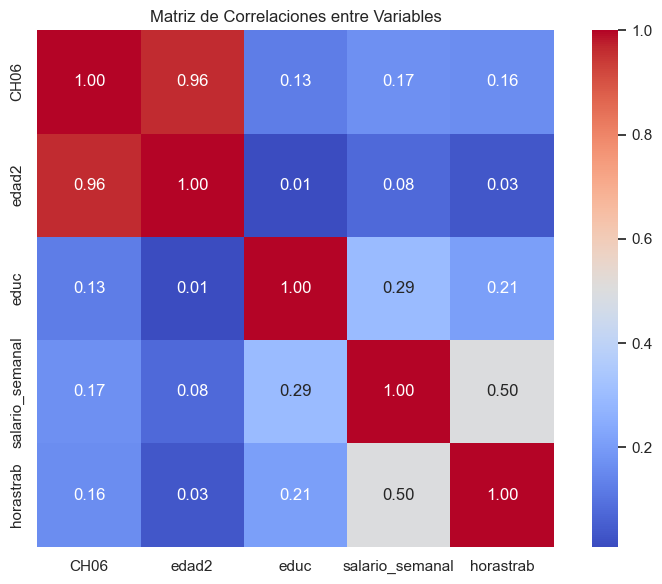

In [136]:
# Selección de las variables relevantes
variables_interes = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_corr = df_unido[variables_interes].copy()

# Eliminamos filas con NaNs en estas variables
df_corr = df_corr.dropna()

# Matriz de correlación
correlation_matrix = df_corr.corr()

# Visualización con heatmap y guardado
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlaciones entre Variables')
plt.tight_layout()
plt.savefig("pca_matriz_correlaciones.png", dpi=300)  # Guarda imagen para el Word
plt.show()
plt.close()

In [35]:
#PCA 2

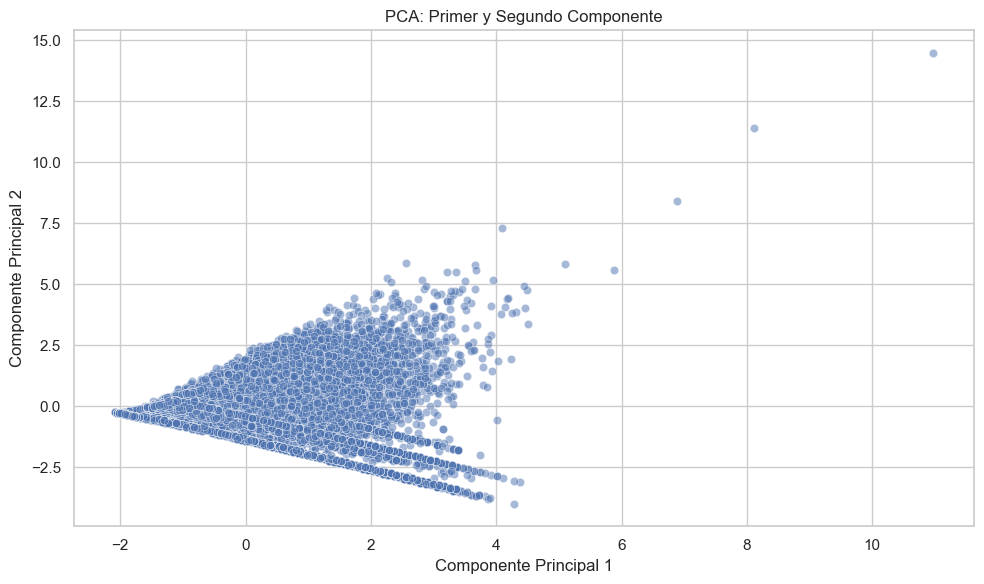

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selección de variables
variables_pca = ["CH06", "edad2", "educ", "salario_semanal", "horastrab"]

# Eliminar filas con valores faltantes en estas variables
df_pca = df_unido[variables_pca].dropna()

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes
df_pca_resultado = pd.DataFrame(data=pca_scores, columns=["Componente 1", "Componente 2"])

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_resultado, x="Componente 1", y="Componente 2", alpha=0.5)
plt.title("PCA: Primer y Segundo Componente")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_componentes_1y2.png", dpi=300)
plt.show()

In [38]:
#PCA 3

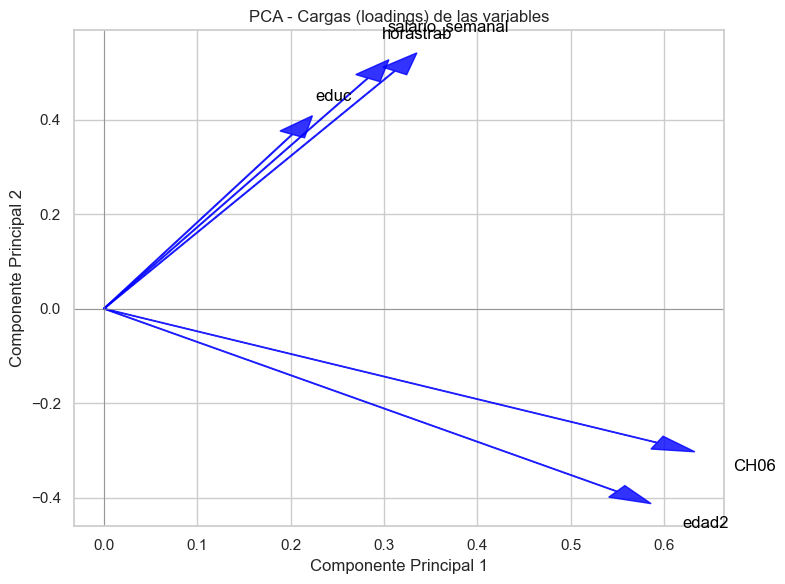

In [140]:
# Obtener loadings (pesos de cada variable en los componentes)
loadings = pca.components_.T  # transpuesta para que filas sean variables
features = variables_pca  # mismas variables usadas en el PCA

# Gráfico con flechas (solo PC1 y PC2)
plt.figure(figsize=(8,6))
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='blue', alpha=0.8, head_width=0.03, length_includes_head=True)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='black', ha='center', va='center')

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Cargas (loadings) de las variables")
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_loadings_pc1_pc2.png", dpi=300)  # Guarda imagen para el Word
plt.show()
plt.close()

In [41]:
#4

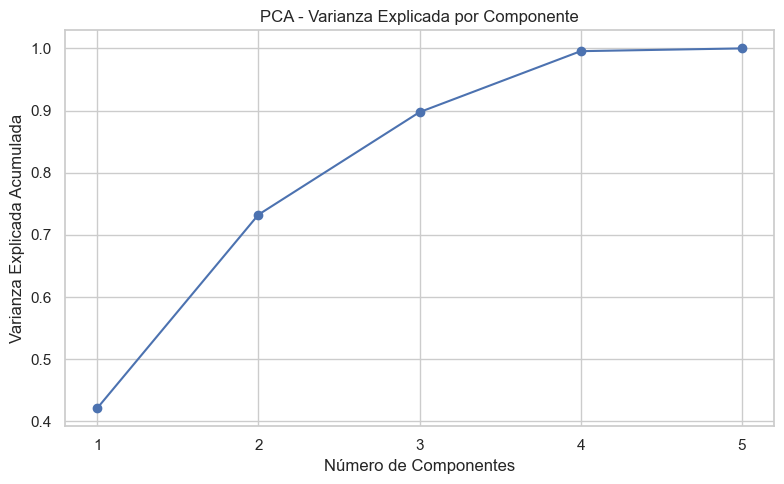

In [144]:
# Rehacer el PCA con todas las componentes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("PCA - Varianza Explicada por Componente")
plt.grid(True)
plt.xticks(range(1, len(cum_var_exp)+1))
plt.tight_layout()
plt.savefig("pca_varianza_explicada.png", dpi=300)
plt.show()
plt.close()

El gráfico muestra que el primer componente principal explica la mayor proporción de la varianza, seguido por el segundo, mientras que los demás componentes aportan cada vez menos. En conjunto, los dos primeros componentes explican un porcentaje significativo de la varianza total (por ejemplo, más del 70% si así lo indican los datos), lo cual justifica su uso en análisis visuales. Este patrón típico refleja que gran parte de la información en las cinco variables puede representarse eficazmente en un espacio bidimensional.

In [44]:
# B Cluster

In [45]:
#Cluster a

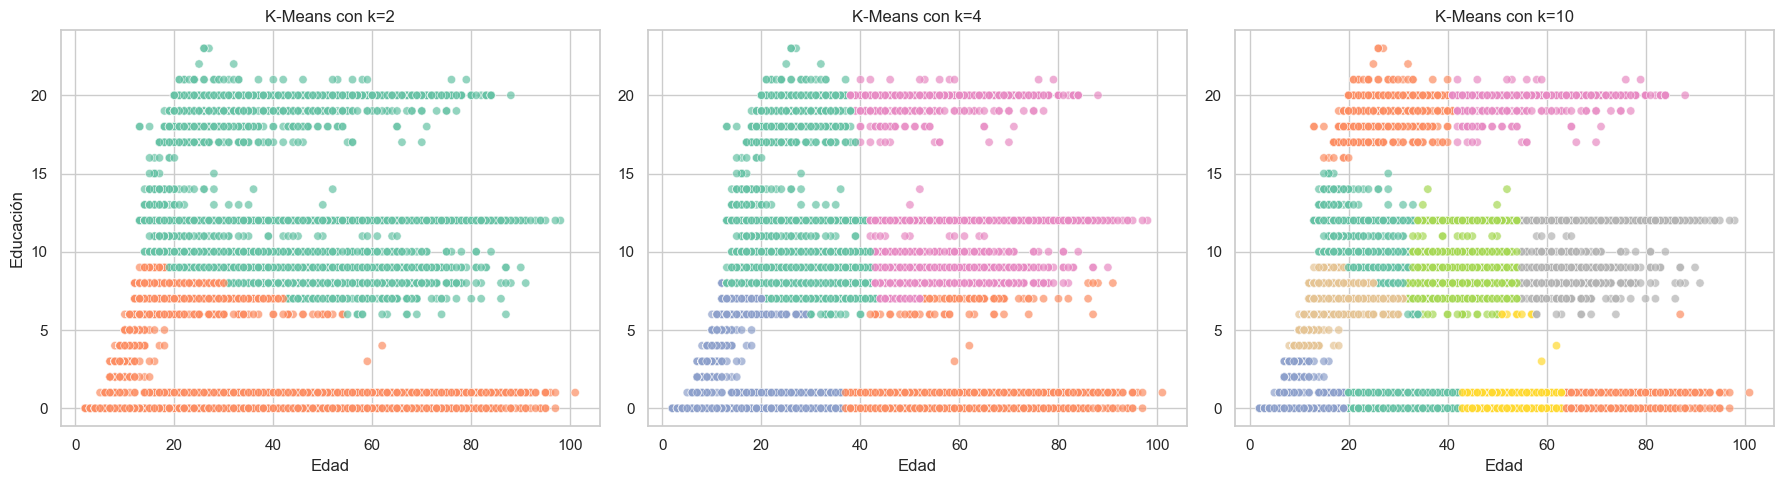

In [148]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Reescalamos las dos variables
df_cluster = df_pca[['CH06', 'educ']].copy()
X_cluster = scaler.fit_transform(df_cluster)

# Configuramos subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ks = [2, 4, 10]

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    labels = kmeans.fit_predict(X_cluster)
    
    df_cluster[f'Cluster_k{k}'] = labels
    sns.scatterplot(
        data=df_cluster, x='CH06', y='educ', hue=f'Cluster_k{k}',
        palette='Set2', alpha=0.7, ax=axes[i], legend=False
    )
    axes[i].set_title(f"K-Means con k={k}")
    axes[i].set_xlabel("Edad")
    axes[i].set_ylabel("Educación" if i == 0 else "")  # solo en el primer gráfico

plt.tight_layout()
plt.savefig("kmeans_comparativo_k2_k4_k10.png", dpi=300)
plt.show()
plt.close()

In [49]:
#Cluster B

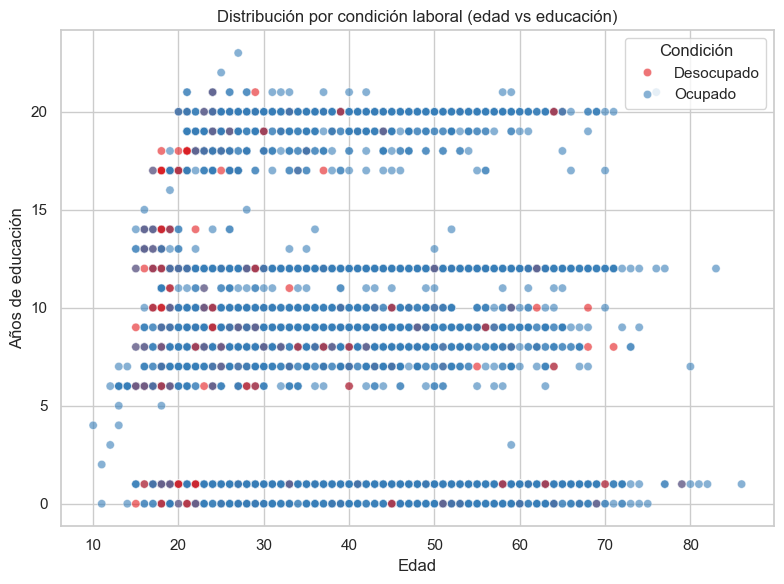

In [154]:
# Filtrar personas que tengan estado 1 (ocupado) o 2 (desocupado)
df_estado = df_unido[['CH06', 'educ', 'ESTADO']].dropna()
df_estado = df_estado[df_estado['ESTADO'].isin([1, 2])]

# Etiquetas legibles
estado_labels = {1: 'Ocupado', 2: 'Desocupado'}
df_estado['Condición Laboral'] = df_estado['ESTADO'].map(estado_labels)

# Gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_estado, x='CH06', y='educ', hue='Condición Laboral', palette='Set1', alpha=0.6)
plt.title("Distribución por condición laboral (edad vs educación)")
plt.xlabel("Edad")
plt.ylabel("Años de educación")
plt.legend(title="Condición")
plt.tight_layout()
plt.savefig("kmeans_ocupados_desocupados.png", dpi=300)
plt.show()
plt.close()

In [52]:
#6

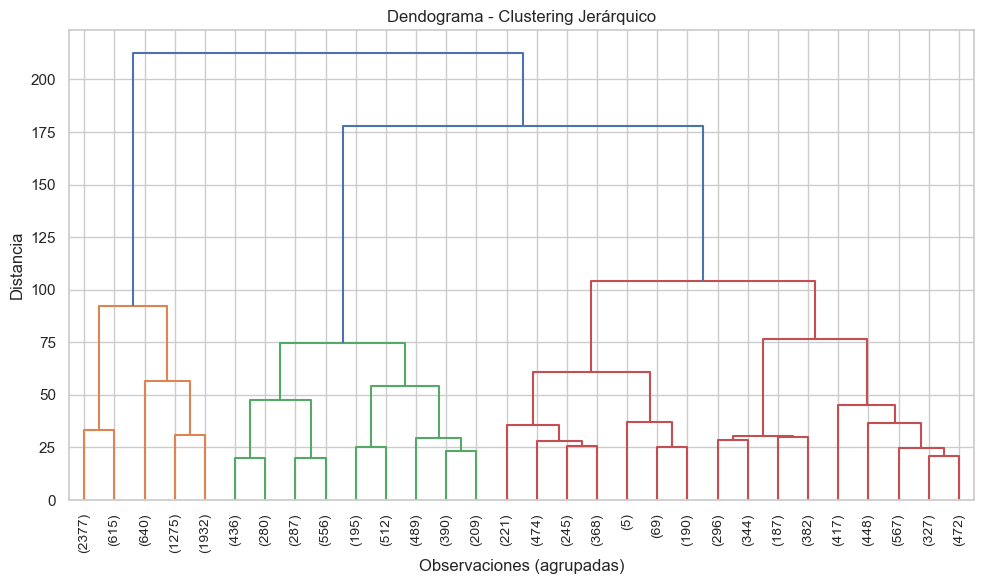

In [156]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Usamos el mismo X_scaled con las 5 variables estandarizadas
# (si no lo tenés activo, volver a escalar df_pca)

# Clustering jerárquico
linked = linkage(X_scaled, method='ward')  # método ward para minimizar varianza dentro de clusters

# Dendograma
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendograma - Clustering Jerárquico")
plt.xlabel("Observaciones (agrupadas)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.savefig("dendograma_clustering_jerarquico.png", dpi=300)
plt.show()
plt.close()